# Plotnine Contest Submission: A Journey Through Gene Expression (Entry 3) 🧬🎨


## Summary
This project explores gene expression changes in 9 human melanoma cell lines compared to freshly isolated normal primary melanocytes. The dataset, sourced from GEO `(GSE88741)`, was processed using `ARCHS4` pipeline, providing a rich playground for data visualization using Python's plotnine library.
1. **Organism:** Homo sapiens
2. **Source**: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE88741

This dataset is published and publicly available in the Gene Expression Omnibus and processed by ARCHS4. I gratefully acknowledge ARCHS4 for this data:

> Lachmann A, Torre D, Keenan AB, Jagodnik KM, Lee HJ, Wang L, Silverstein MC, Ma'ayan A. Massive mining of publicly available RNA-seq data from human and mouse. Nature Communications 9. Article number: 1366 (2018), doi:10.1038/s41467-018-03751-6



## Table of Contents

* Load Dataset
* PCA
* Volcano Plot
* MA Plot
* Heatmap: With and without metadata

## 💡 Motivation
This contest entry is special because I stepped out of my R comfort zone to recreate my gene expression analysis in Python using Plotnine, which shares the same syntax as ggplot2. 🐍➡️📈

It took me days of meticulous work to master Plotnine and recreate pivotal plots for my gene expression analysis. Each plot, from the volcano plot identifying significant changes to the comprehensive MA plot, was crafted with care. 🧬🎨

Facing numerous challenges, I often questioned if the switch was worth it. Yet, with determination and creativity, I refined my approach, exploring multiple techniques. The process was as much about discovery as it was about persistence. 🚀🔍

This comprehensive project highlights my adaptability and passion for data science. 🚀💪

## 📦 Package Requirements

In [22]:
pip install -q polars plotnine pandas scikit-learn numpy adjustText seaborn

## The Plotnine Saga 📚✨
Once upon a time, in a land of data far, far away, there lived a curious scientist who stumbled upon a treasure trove of gene expression data. Armed with Python and the magical plotnine library, our hero set out on an epic quest to uncover the secrets hidden within.


In [23]:
import pandas as pd
import numpy as np
from tabulate import tabulate

def load_expression_data(file_path):
    """
    Load RNA expression data from a tab-delimited text file.

    Args:
    file_path (str): Path to the RNA expression data file.

    Returns:
    pd.DataFrame: Expression data with genes as rows and samples as columns.
    """
    df = pd.read_csv(file_path, sep='\t', index_col=0)
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

def load_metadata(file_path):
    """
    Load metadata from a tab-delimited text file.

    Args:
    file_path (str): Path to the metadata file.

    Returns:
    pd.DataFrame: Metadata with samples as rows and attributes as columns.
    """
    df = pd.read_csv(file_path, sep='\t')
    df.set_index('Sample_geo_accession', inplace=True)
    return df

def load_dataset(expression_file_path, metadata_file_path):
    """
    Load both expression data and metadata.

    Args:
    expression_file_path (str): Path to the RNA expression data file.
    metadata_file_path (str): Path to the metadata file.

    Returns:
    tuple: (expression_data, metadata)
    """
    expression_data = load_expression_data(expression_file_path)
    metadata = load_metadata(metadata_file_path)

    common_samples = set(expression_data.columns) & set(metadata.index)
    expression_data = expression_data[list(common_samples)]
    metadata = metadata.loc[list(common_samples)]

    return expression_data, metadata

def load_signature_data(file_path):
    """
    Load differential expression signature data from a tab-delimited text file.

    Args:
    file_path (str): Path to the differential expression data file.

    Returns:
    pd.DataFrame: Differential expression data with relevant columns.
    """
    df = pd.read_csv(file_path, sep='\t')
    return df

expression_file_path = 'Data/GSE88741-expression.txt'
metadata_file_path = 'Data/GSE88741-metadata.txt'
signature_file_path = 'Data/Normal_vs_Perturbation.txt'

expression_data, metadata = load_dataset(expression_file_path, metadata_file_path)

# Load signature data
signature_data = load_signature_data(signature_file_path)

print("Expression Data:")
print(tabulate(expression_data.head(), headers='keys', tablefmt='psql'))

print("\nMetadata:")
print(tabulate(metadata.head(), headers='keys', tablefmt='psql'))

print("\nSignature Data:")
print(tabulate(signature_data.head(), headers='keys', tablefmt='psql'))


Expression Data:
+---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| gene_symbol   |   GSM2344965 |   GSM2344969 |   GSM2344973 |   GSM2344972 |   GSM2344968 |   GSM2344967 |   GSM2344976 |   GSM2344966 |   GSM2344971 |   GSM2344974 |   GSM2344975 |   GSM2344970 |
|---------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------|
| A1BG          |          400 |          363 |          301 |          248 |          331 |          490 |          310 |          320 |          225 |          755 |          391 |          390 |
| A1CF          |            1 |            0 |            3 |            2 |            0 |            3 |            5 |            1 |            0 |            1 |            0 |         

## Chapter 1: The PCA Revelation 🔮

Our journey began with a Principal Component Analysis (PCA). Using plotnine's `ggplot` and `geom_point`, we crafted a beautiful plot that revealed the mysterious relationships between samples. The `scale_color_manual` allowed us to paint each sample with its own unique hue, while `theme_light` and custom theme elements gave our plot a polished, professional look.

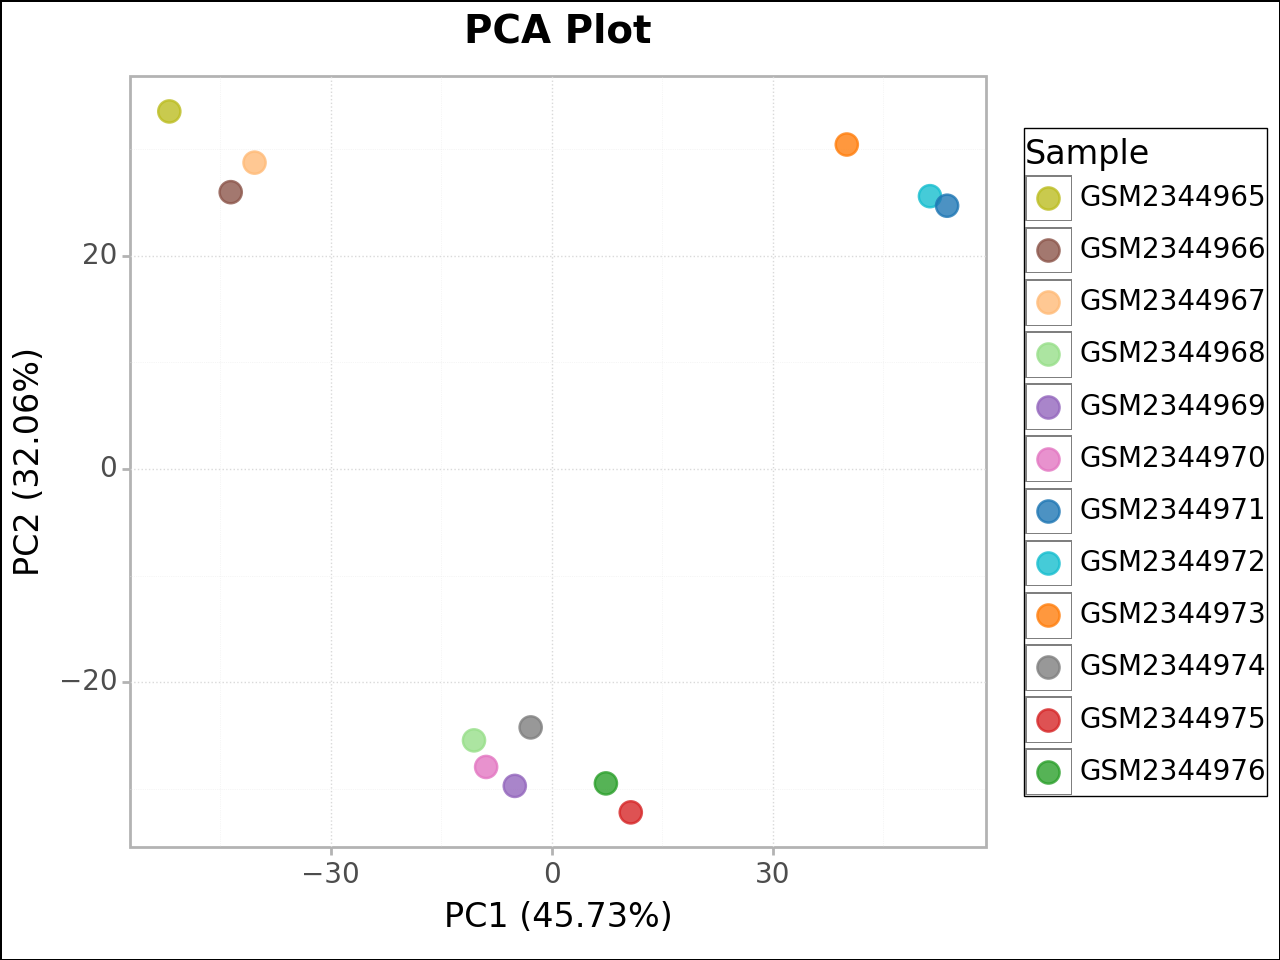

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Plots/pca_plot.png


Plot saved as 'pca_plot.png'


In [24]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def analyze_pca(dataset, nr_genes=2500, normalization='logCPM', z_score=True):
    # Select top variable genes
    gene_vars = dataset.var(axis=1).sort_values(ascending=False)
    top_genes = gene_vars.head(nr_genes).index
    dataset_subset = dataset.loc[top_genes]

    # Apply normalization
    if normalization == 'logCPM':
        dataset_subset = np.log2(dataset_subset + 1)

    # Apply z-score normalization if requested
    if z_score:
        scaler = StandardScaler()
        dataset_subset = pd.DataFrame(scaler.fit_transform(dataset_subset.T).T,
                                      index=dataset_subset.index,
                                      columns=dataset_subset.columns)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(dataset_subset.T)

    # Create DataFrame for plotting
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=dataset_subset.columns)
    pca_df['sample'] = pca_df.index

    # Define a color-friendly palette
    color_palette = {
        'GSM2344971': '#1f77b4',  # Blue
        'GSM2344973': '#ff7f0e',  # Orange
        'GSM2344976': '#2ca02c',  # Green
        'GSM2344975': '#d62728',  # Red
        'GSM2344969': '#9467bd',  # Purple
        'GSM2344966': '#8c564b',  # Brown
        'GSM2344970': '#e377c2',  # Pink
        'GSM2344974': '#7f7f7f',  # Gray
        'GSM2344965': '#bcbd22',  # Olive
        'GSM2344972': '#17becf',  # Teal
        'GSM2344967': '#ffbb78',  # Light Orange
        'GSM2344968': '#98df8a'   # Light Green
    }

    # Create the plot
    plot = (ggplot(pca_df, aes(x='PC1', y='PC2', color='sample'))
            + geom_point(size=4, alpha=0.8)  # Increase point size for visibility
            + scale_color_manual(values=color_palette)  # Apply custom color palette
            + theme_light()  # Use the theme_bw for a clean look
            + theme(
                panel_grid_major=element_line(size=0.5, linetype='dotted'),
                panel_grid_minor=element_line(size=0.25, linetype='dotted'),
                legend_position='right',
                legend_title=element_text(size=12),
                legend_text=element_text(size=10),
                axis_text=element_text(size=10),
                axis_title=element_text(size=12),
                plot_title=element_text(size=14, face="bold", hjust=0.5),
                legend_background=element_rect(fill='white', color='black', size=0.5, linetype='solid'),
                panel_background=element_rect(fill='white', color='black'),  # Clean background
                plot_background=element_rect(fill='white', color='black')  # Clean background
            )
            + labs(title='PCA Plot',
                   x=f'PC1 ({pca.explained_variance_ratio_[0]:.2%})',
                   y=f'PC2 ({pca.explained_variance_ratio_[1]:.2%})',
                   color='Sample')
    )

    return plot

# Assuming 'expression_data' is your loaded dataset
pca_plot = analyze_pca(expression_data)
print(pca_plot)

pca_plot.save('Plots/pca_plot.png', dpi=300)
print("Plot saved as 'pca_plot.png'")

But wait! Our hero thought, "What if we could see this data from different angles?" And thus, the PCA Facet Plot was born. With `facet_wrap`, we created a triptych of principal components, each telling its own part of the story.

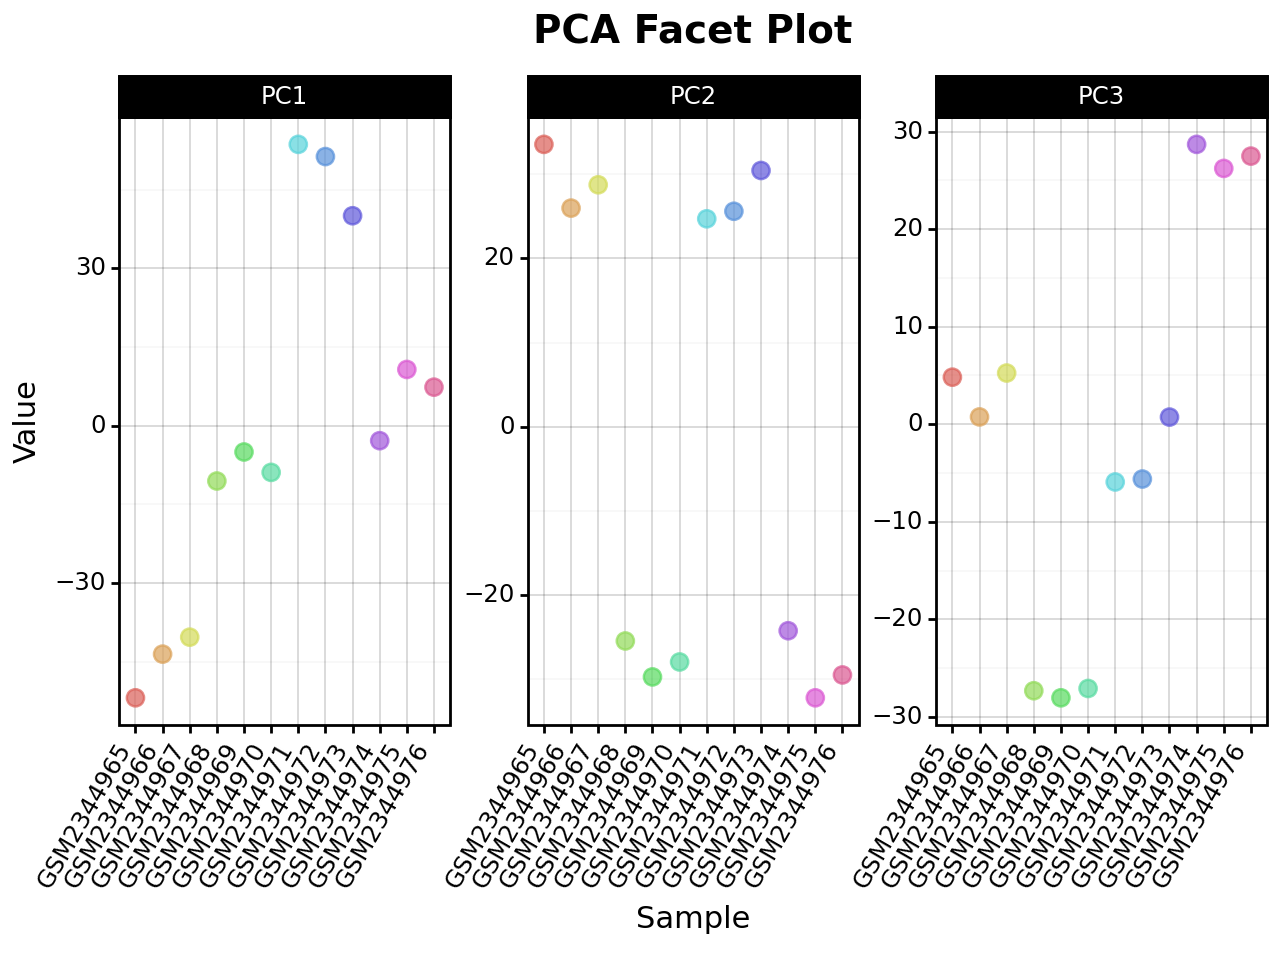

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Plots/pca_facet_plot.png


Plot saved as 'pca_facet_plot.png'


In [25]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def analyze_pca_facet(dataset, nr_genes=2500, normalization='logCPM', z_score=True):
    # Select top variable genes
    gene_vars = dataset.var(axis=1).sort_values(ascending=False)
    top_genes = gene_vars.head(nr_genes).index
    dataset_subset = dataset.loc[top_genes]

    # Apply normalization
    if normalization == 'logCPM':
        dataset_subset = np.log2(dataset_subset + 1)

    # Apply z-score normalization if requested
    if z_score:
        scaler = StandardScaler()
        dataset_subset = pd.DataFrame(scaler.fit_transform(dataset_subset.T).T,
                                      index=dataset_subset.index,
                                      columns=dataset_subset.columns)

    # Perform PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(dataset_subset.T)

    # Create DataFrame for plotting
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=dataset_subset.columns)
    pca_df = pca_df.reset_index().melt(id_vars='index', var_name='PC', value_name='value')

    # Create facet plot
    plot = (ggplot(pca_df, aes(x='index', y='value', color='index'))
            + geom_point(size=3, alpha=0.7)
            + facet_wrap('~ PC', scales='free')
            + theme_linedraw()
            + theme(axis_text_x=element_text(angle=60, hjust=1), legend_position='none', plot_title=element_text(size=14, face="bold", hjust=0.5))
            + labs(title='PCA Facet Plot',
                   x='Sample',
                   y='Value'))

    return plot

# Assuming 'expression_data' is your loaded dataset
pca_facet_plot = analyze_pca_facet(expression_data)
print(pca_facet_plot)

pca_facet_plot.save('Plots/pca_facet_plot.png', dpi=300)
print("Plot saved as 'pca_facet_plot.png'")


## Chapter 2: The Volcano Awakens 🌋

As we ventured deeper into our data, we encountered a dormant volcano of differential expression. Using `geom_point` and `scale_color_manual`, we brought this volcano to life, its eruption revealing genes of significance. `geom_hline` and `geom_vline` drew lines of threshold, separating the mundane from the extraordinary.

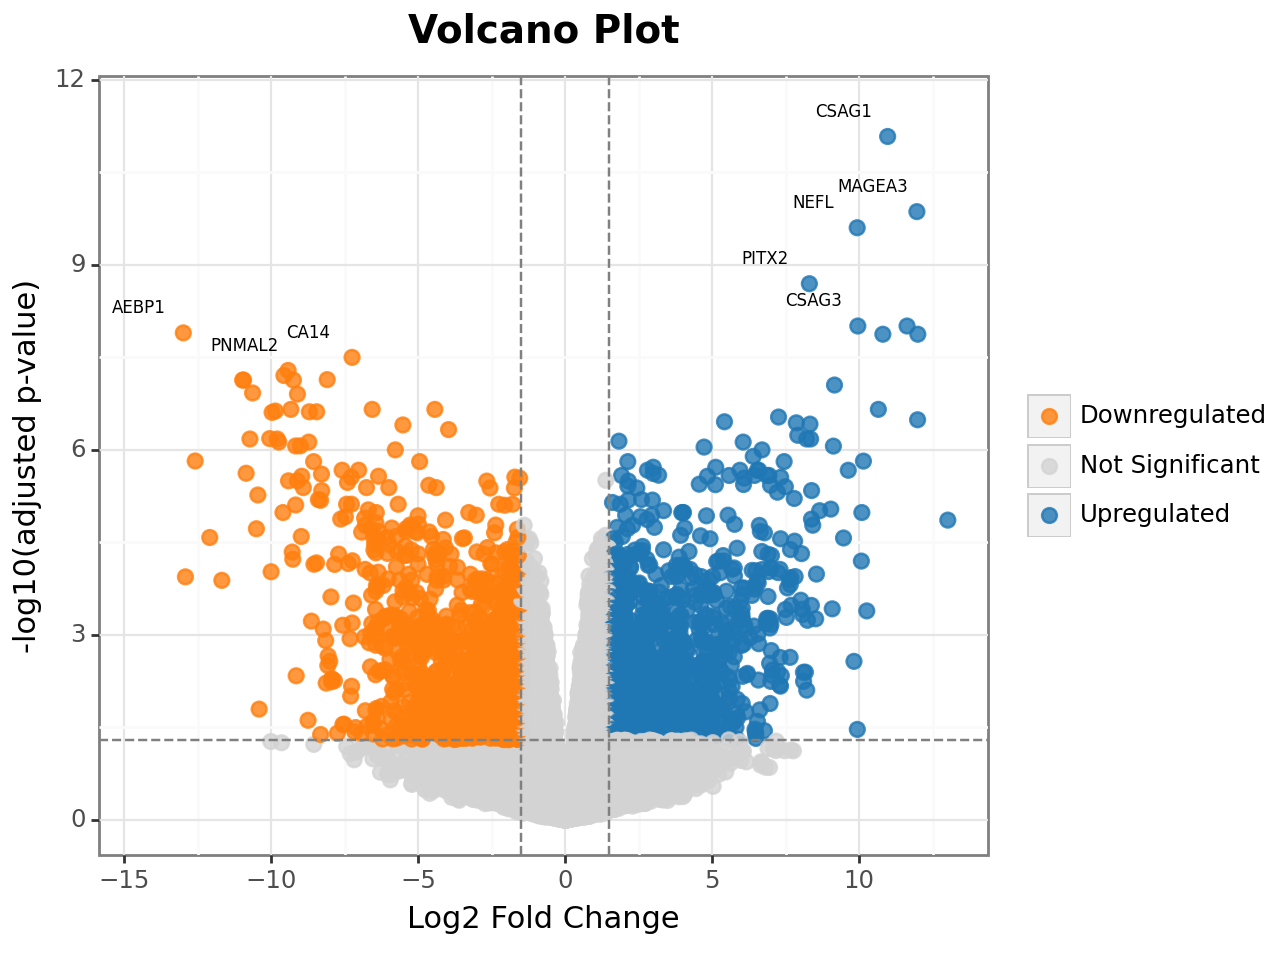

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Plots/volcano_plot.png


Plot saved as 'volcano_plot.png'


In [26]:
from plotnine import *
import numpy as np
import pandas as pd

def analyze_volcano_plot(signature, pvalue_threshold=0.05, logfc_threshold=1.5):
    signature['significant'] = (signature['adj.P.Val'] < pvalue_threshold) & (abs(signature['logFC']) > logfc_threshold)
    signature['-log10padj'] = -np.log10(signature['adj.P.Val'])

    # Categorize genes into upregulated and downregulated
    signature['category'] = np.where(
        (signature['logFC'] > logfc_threshold) & (signature['significant']),
        'Upregulated',
        np.where(
            (signature['logFC'] < -logfc_threshold) & (signature['significant']),
            'Downregulated',
            'Not Significant'
        )
    )

    # Identify top 10 upregulated and downregulated genes
    top_upregulated = signature[signature['category'] == 'Upregulated'].nlargest(5, '-log10padj')
    top_downregulated = signature[signature['category'] == 'Downregulated'].nlargest(3, '-log10padj')
    top_genes = pd.concat([top_upregulated, top_downregulated])

    plot = (ggplot(signature, aes(x='logFC', y='-log10padj', color='category'))
            + geom_point(alpha=0.8, size=2.5)
            + scale_color_manual(values={'Upregulated': '#1f77b4', 'Downregulated': '#ff7f0e', 'Not Significant': '#d3d3d3'})
            + theme_bw()
            + labs(title='Volcano Plot', x='Log2 Fold Change', y='-log10(adjusted p-value)')
            + geom_hline(yintercept=-np.log10(pvalue_threshold), linetype='dashed', color='grey')
            + geom_vline(xintercept=[-logfc_threshold, logfc_threshold], linetype='dashed', color='grey')
            + theme(legend_title=element_blank())
            + geom_text(data=top_genes, mapping=aes(label='gene_symbol'), size=6, nudge_y=0.4, nudge_x=-1.5, color='black')
            + theme(legend_position='right', plot_title=element_text(size=14, face="bold", hjust=0.5)))

    return plot

# Assuming 'signature_data' is your loaded dataset with appropriate columns
# If the genes are in the 'gene_symbol' column
signature_data['gene_symbol'] = signature_data['gene_symbol']  # Make sure this column exists

# Generate the volcano plot
volcano_plot = analyze_volcano_plot(signature_data)
print(volcano_plot)

volcano_plot.save('Plots/volcano_plot.png', dpi=300)
print("Plot saved as 'volcano_plot.png'")


## Chapter 3: The MA Plot Unfolds 📈

Our hero then unfurled the MA Plot, a map of gene expression changes. With `geom_point` and custom `annotate` functions, we highlighted the most dramatic changes in our gene landscape. The `scale_color_manual` once again proved invaluable, painting our genes in hues of significance.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4055 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


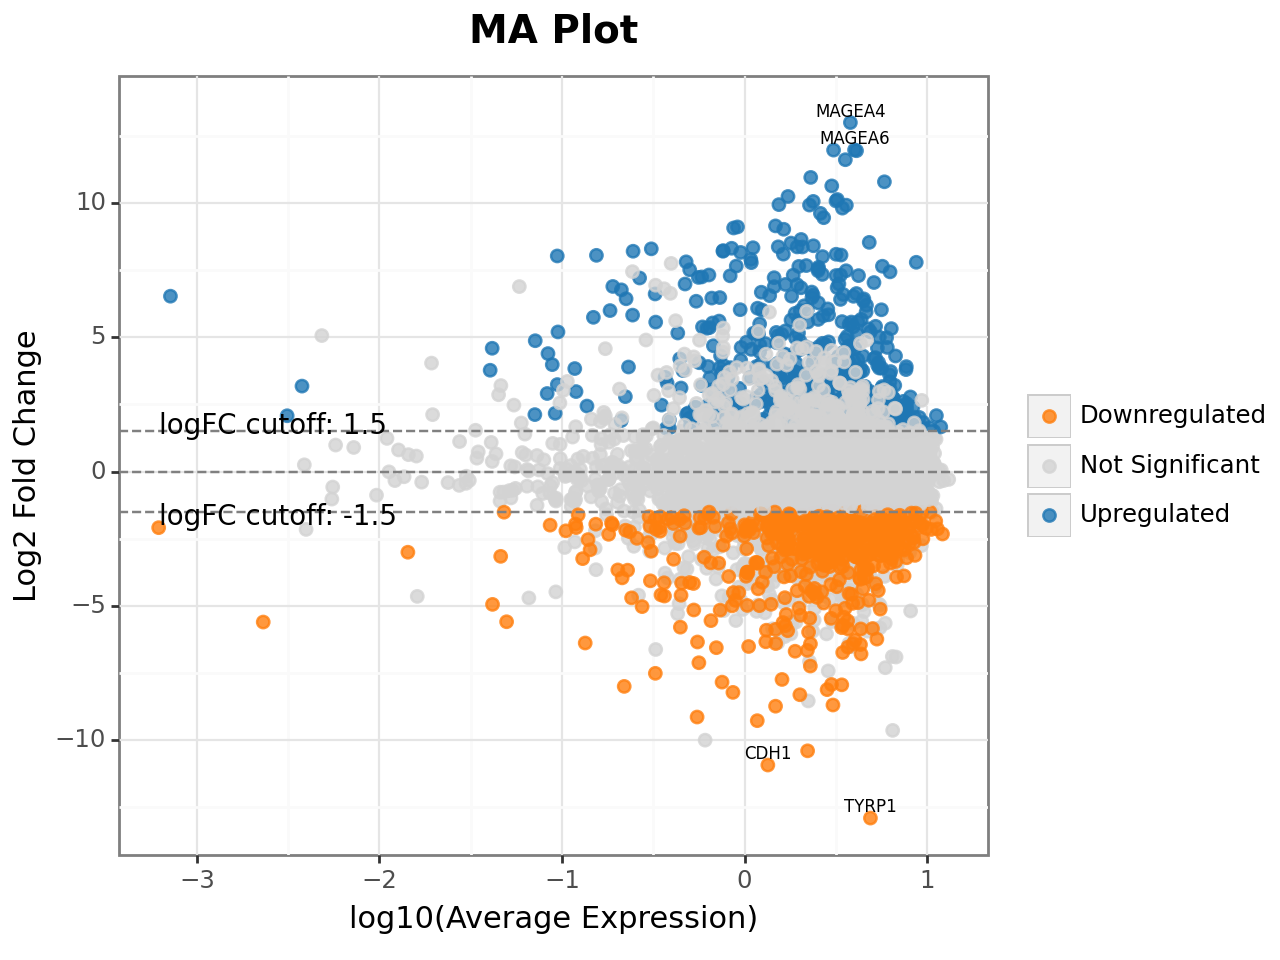

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Plots/ma_plot.png
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4055 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


Plot saved as 'ma_plot.png'


In [27]:
from plotnine import *
import numpy as np
import pandas as pd

def analyze_ma_plot(signature, pvalue_threshold=0.05, logfc_threshold=1.5):
    signature['significant'] = (signature['adj.P.Val'] < pvalue_threshold) & (abs(signature['logFC']) > logfc_threshold)
    signature['AveExpr_log10'] = np.log10(signature['AveExpr'])

    # Categorize genes into upregulated and downregulated
    signature['category'] = np.where(
        (signature['logFC'] > logfc_threshold) & (signature['significant']),
        'Upregulated',
        np.where(
            (signature['logFC'] < -logfc_threshold) & (signature['significant']),
            'Downregulated',
            'Not Significant'
        )
    )

    # Identify top 10 upregulated and downregulated genes
    top_upregulated = signature[signature['category'] == 'Upregulated'].nlargest(2, 'logFC')
    top_downregulated = signature[signature['category'] == 'Downregulated'].nsmallest(10, 'logFC')
    top_genes = pd.concat([top_upregulated, top_downregulated])

    plot = (ggplot(signature, aes(x='AveExpr_log10', y='logFC', color='category'))
            + geom_point(alpha=0.8, size=2.0)
            + scale_color_manual(values={'Upregulated': '#1f77b4', 'Downregulated': '#ff7f0e', 'Not Significant': '#d3d3d3'})
            + theme_bw()
            + labs(title='MA Plot', x='log10(Average Expression)', y='Log2 Fold Change')
            + geom_hline(yintercept=0, linetype='dashed', color='grey')
            + geom_hline(yintercept=[-logfc_threshold, logfc_threshold], linetype='dashed', color='grey')
            + annotate('text', x=min(signature['AveExpr_log10']), y=logfc_threshold + 0.2, label=f'logFC cutoff: {logfc_threshold}', color='black', size=10, ha='left')
            + annotate('text', x=min(signature['AveExpr_log10']), y=-logfc_threshold - 0.2, label=f'logFC cutoff: {-logfc_threshold}', color='black', size=10, ha='left')
            + geom_text(data=top_genes, mapping=aes(label='gene_symbol'), size=6, nudge_y=0.4, color='black')
            + theme(legend_title=element_blank(), legend_position='right', plot_title=element_text(size=14, face="bold", hjust=0.5)))

    return plot

# Assuming 'signature_data' is your loaded dataset with appropriate columns
# Ensure the 'gene_symbol' column exists
signature_data['gene_symbol'] = signature_data['gene_symbol']  # Make sure this column exists

# Generate the MA plot
ma_plot = analyze_ma_plot(signature_data)
print(ma_plot)

ma_plot.save('Plots/ma_plot.png', dpi=300)
print("Plot saved as 'ma_plot.png'")


## Chapter 4: The Heatmap Chronicles 🔥🗺️

In the final chapter of our adventure, we faced the challenge of the Heatmap. First, we created a simple heatmap using `geom_tile`, with each tile representing a gene's expression in a sample. The `scale_fill_gradientn` allowed us to paint our heatmap in a rainbow of expression levels.

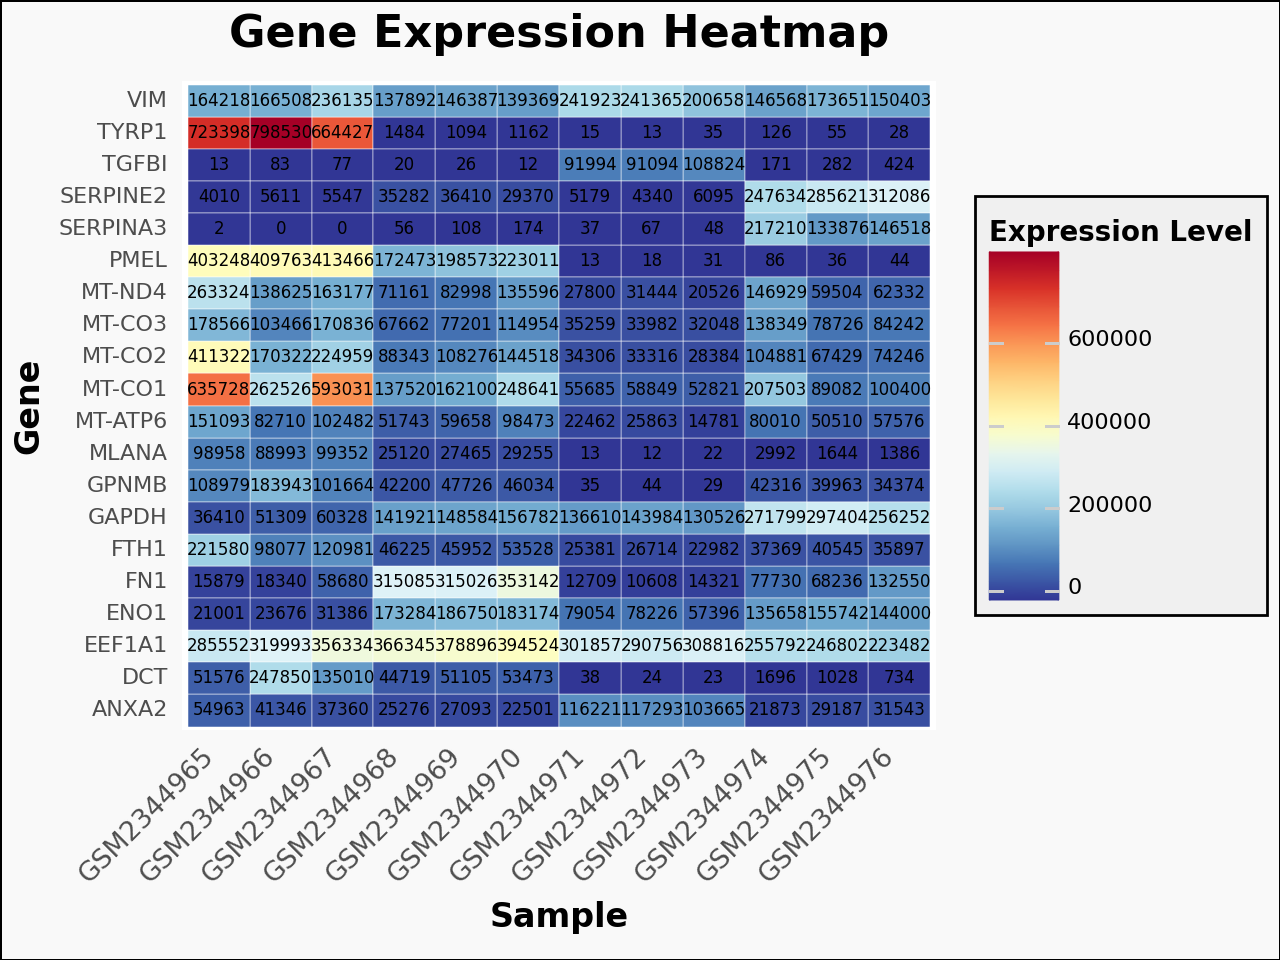

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Plots/heatmap.png


Plot saved as 'heatmap.png'


In [28]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy.cluster.hierarchy import linkage, leaves_list

def calculate_variability(expression_data, method='SD'):
    if method == 'SD':
        return expression_data.std(axis=1)
    else:
        raise ValueError("Method must be 'SD'.")

def plot_heatmap(expression_data, top_n=200, variability_method='SD', title='Gene Expression Heatmap'):
    if expression_data.empty:
        raise ValueError("Expression data must not be empty.")

    expression_data['variability'] = calculate_variability(expression_data, method=variability_method)
    top_genes = expression_data.nlargest(top_n, 'variability').drop(columns=['variability'])
    top_genes.index.name = 'gene_symbol'

    gene_linkage = linkage(top_genes, method='average')
    sample_linkage = linkage(top_genes.T, method='average')
    gene_order = leaves_list(gene_linkage)
    sample_order = leaves_list(sample_linkage)
    top_genes = top_genes.iloc[gene_order, sample_order]

    top_genes_melted = top_genes.reset_index().melt(id_vars='gene_symbol', var_name='Sample', value_name='Expression')
    top_genes_melted['Expression'] = top_genes_melted['Expression'].round(2)

    # Calculate the min and max expression values for color scaling
    min_expr = top_genes_melted['Expression'].min()
    max_expr = top_genes_melted['Expression'].max()

    # Create a custom color palette
    custom_palette = scale_fill_gradientn(
        colors=['#313695', '#4575B4', '#74ADD1', '#ABD9E9', '#E0F3F8',
                '#FFFFBF', '#FEE090', '#FDAE61', '#F46D43', '#D73027', '#A50026'],
        values=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        limits=[min_expr, max_expr]
    )

    heatmap_plot = (
        ggplot(top_genes_melted, aes(x='Sample', y='gene_symbol', fill='Expression'))
        + geom_tile(color="white", size=0.1)  # Add white borders to tiles
        + custom_palette
        + geom_text(
            aes(label='Expression'),
            size=6,
            color='black'  # Set a default text color
        )
        + theme_minimal(base_size=12)
        + labs(
            title=title,
            x='Sample',
            y='Gene',
            fill='Expression Level'
        )
        + theme(
            plot_title=element_text(face="bold", size=16, hjust=0.5),
            axis_title=element_text(face="bold"),
            axis_text_x=element_text(angle=45, hjust=1),
            axis_text_y=element_text(size=8),
            legend_background=element_rect(fill='#F0F0F0', color='black'),
            legend_key=element_rect(fill='white', color='black'),
            legend_title=element_text(size=10, face="bold"),
            legend_text=element_text(size=8),
            legend_position='right',
            legend_box_margin=5,       # Add margin around the legend
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            panel_background=element_rect(fill='white', color='black'),
            plot_background=element_rect(fill='#F9F9F9', color='black'),
        )
    )

    return heatmap_plot

# Assuming you have the `expression_data` DataFrame loaded with relevant data
heatmap = plot_heatmap(expression_data, top_n=20, variability_method='SD')
print(heatmap)

heatmap.save('Plots/heatmap.png', dpi=300)
print("Plot saved as 'heatmap.png'")

But our hero wasn't satisfied. "What if we could see how our genes relate to sample metadata?" they wondered. And so, armed with `facet_grid`, we created a new heatmap, this time organized by sample characteristics.

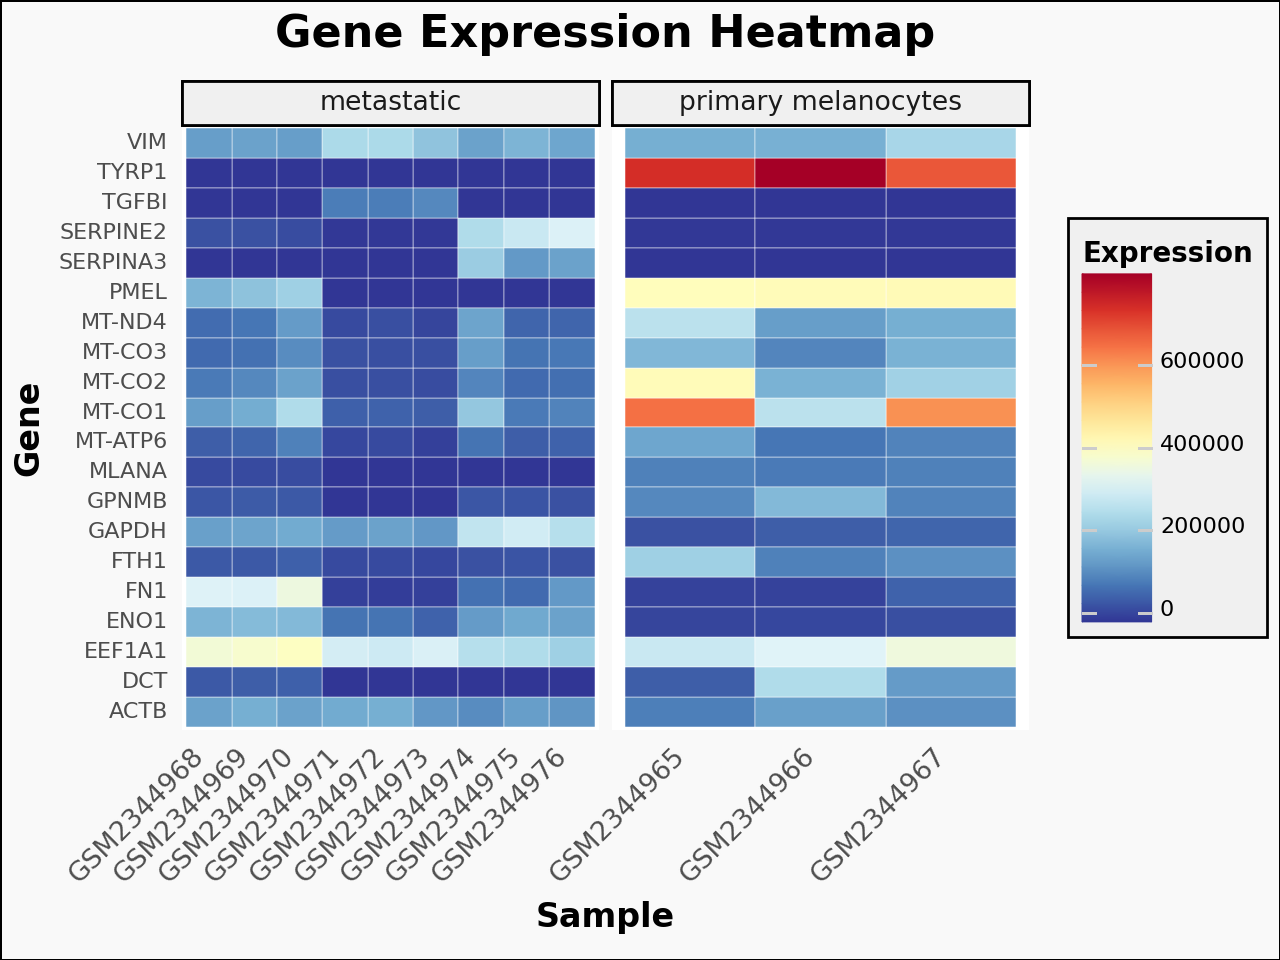

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: Plots/facet_heatmap.png


Plot saved as 'facet_heatmap.png'


In [29]:
import pandas as pd
import numpy as np
from plotnine import *
from scipy.cluster.hierarchy import linkage, leaves_list

def calculate_variability(expression_data, method='SD'):
    if method == 'SD':
        return expression_data.std(axis=1)
    else:
        raise ValueError("Method must be 'SD'.")

def plot_facet_heatmap(expression_data, metadata, top_n=200, variability_method='SD', metadata_column='Stage', title='Gene Expression Heatmap'):
    if expression_data.empty:
        raise ValueError("Expression data must not be empty.")

    # Calculate variability and select top genes
    expression_data['variability'] = calculate_variability(expression_data, method=variability_method)
    top_genes = expression_data.nlargest(top_n, 'variability').drop(columns=['variability'])
    top_genes.index.name = 'gene_symbol'

    # Hierarchical clustering
    gene_linkage = linkage(top_genes, method='average')
    gene_order = leaves_list(gene_linkage)
    top_genes = top_genes.iloc[gene_order, :]

    # Sort samples based on metadata
    sorted_samples = metadata.sort_values(by=metadata_column).index
    top_genes = top_genes[sorted_samples]

    # Melt the expression data to long format
    top_genes_melted = top_genes.reset_index().melt(id_vars='gene_symbol', var_name='Sample', value_name='Expression')
    top_genes_melted['Expression'] = top_genes_melted['Expression'].round(2)

    # Merge metadata for annotation
    top_genes_melted = top_genes_melted.merge(metadata.reset_index(), left_on='Sample', right_on='Sample_geo_accession')

    # Create a custom color palette
    custom_palette = scale_fill_gradientn(
        colors=['#313695', '#4575B4', '#74ADD1', '#ABD9E9', '#E0F3F8',
                '#FFFFBF', '#FEE090', '#FDAE61', '#F46D43', '#D73027', '#A50026']
    )

    # Create the heatmap
    heatmap_plot = (
        ggplot(top_genes_melted, aes(x='Sample', y='gene_symbol', fill='Expression'))
        + geom_tile(color="white", size=0.1)
        + custom_palette
        # + geom_text(aes(label='Expression'), size=6, color='black')
        + theme_minimal(base_size=12)
        + labs(title=title, x='Sample', y='Gene', fill='Expression')
        + theme(
            plot_title=element_text(face="bold", size=16, hjust=0.5),
            axis_title=element_text(face="bold"),
            axis_text_x=element_text(angle=45, hjust=1),
            axis_text_y=element_text(size=8),
            legend_background=element_rect(fill='#F0F0F0', color='black'),
            legend_key=element_rect(fill='white', color='black'),
            legend_title=element_text(size=10, face="bold"),
            legend_text=element_text(size=8),
            legend_position='right',
            legend_box_margin=5,       # Add margin around the legend
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank(),
            panel_background=element_rect(fill='white', color='black'),
            plot_background=element_rect(fill='#F9F9F9', color='black'),
            strip_background=element_rect(fill='#F0F0F0', color='black')
        )
        + facet_grid(facets='~{}'.format(metadata_column), scales='free_x', space='free')
    )

    return heatmap_plot

# Assuming you have the `expression_data` DataFrame loaded with relevant data
facet_heatmap = plot_facet_heatmap(expression_data, metadata, top_n=20, variability_method='SD', metadata_column='Stage')
print(facet_heatmap)

facet_heatmap.save('Plots/facet_heatmap.png', dpi=300)
print("Plot saved as 'facet_heatmap.png'")

## Epilogue

As our journey came to an end, our hero looked back on their adventure with pride. They had mastered the art of plotnine, wielding `geom_tile`, `facet_grid`, `scale_fill_gradient`, and many other powerful function references. But more importantly, they had brought their data to life, telling its story in vibrant colors and shapes.

And here, I present to you this tale of data visualization, a testament to the power of Python, plotnine, and the art of storytelling through graphs. May it inspire future data adventurers to embark on their own quests of discovery! 🚀📊🎉

